In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D


from google.colab import files
uploaded = files.upload()

# Load data
data = pd.read_csv("11-Advertising.csv")
print(data.head())

Saving 11-Advertising.csv to 11-Advertising (1).csv
   Unnamed: 0     TV  Radio  Newspaper  Sales
0           1  230.1   37.8       69.2   22.1
1           2   44.5   39.3       45.1   10.4
2           3   17.2   45.9       69.3    9.3
3           4  151.5   41.3       58.5   18.5
4           5  180.8   10.8       58.4   12.9


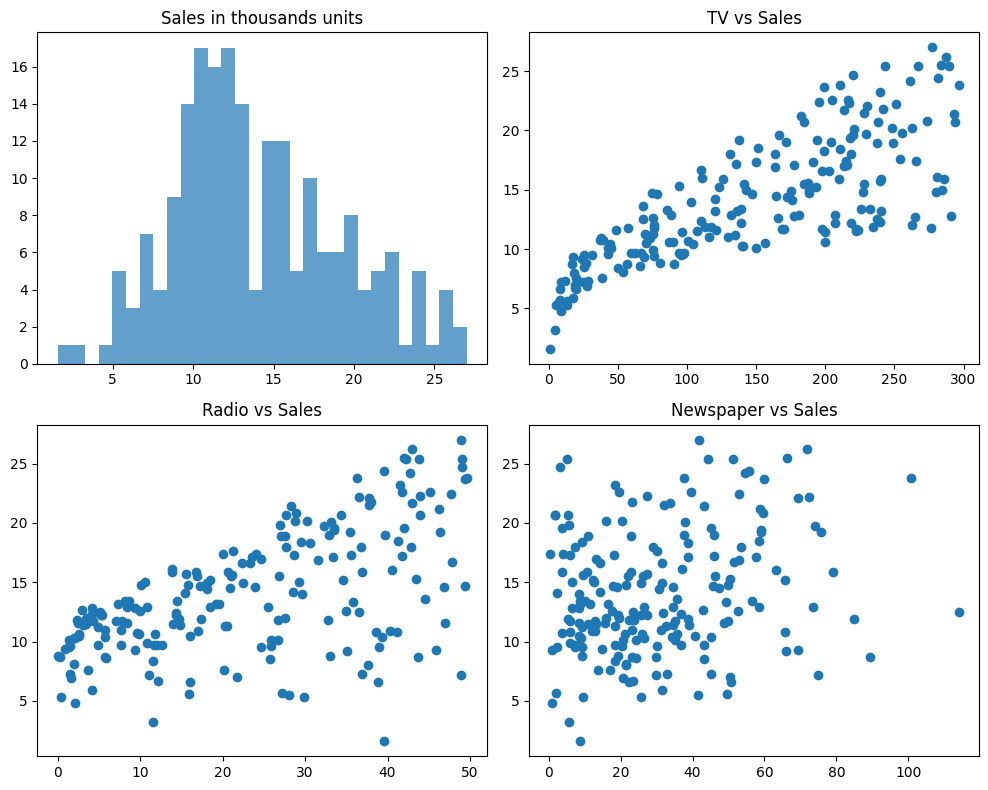

In [7]:
# Plotting
plt.figure(figsize=(10, 8))
plt.subplot(2, 2, 1)
plt.hist(data['Sales'], bins=30, alpha=0.7)
plt.title("Sales in thousands units")

plt.subplot(2, 2, 2)
plt.scatter(data['TV'], data['Sales'])
plt.title("TV vs Sales")

plt.subplot(2, 2, 3)
plt.scatter(data['Radio'], data['Sales'])
plt.title("Radio vs Sales")

plt.subplot(2, 2, 4)
plt.scatter(data['Newspaper'], data['Sales'])
plt.title("Newspaper vs Sales")

plt.tight_layout()
plt.show()

In [8]:
# Simple linear regressions
m1_1 = sm.OLS(data['Sales'], sm.add_constant(data['TV'])).fit()
print(m1_1.summary())

m1_2 = sm.OLS(data['Sales'], sm.add_constant(data['Radio'])).fit()
print(m1_2.summary())

m1_3 = sm.OLS(data['Sales'], sm.add_constant(data['Newspaper'])).fit()
print(m1_3.summary())

# Multiple regression
m1_4 = sm.OLS(data['Sales'], sm.add_constant(data[['TV', 'Radio']])).fit()
print(m1_4.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Sat, 22 Feb 2025   Prob (F-statistic):           1.47e-42
Time:                        19:39:15   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0326      0.458     15.360      0.0

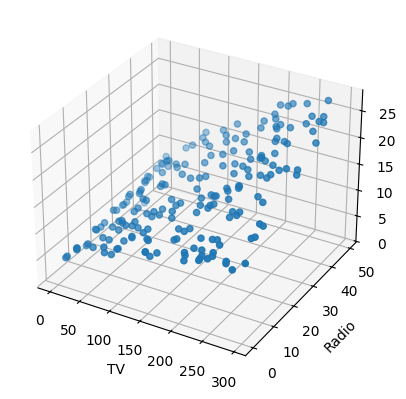

In [9]:
# 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data['TV'], data['Radio'], data['Sales'])
ax.set_xlabel('TV')
ax.set_ylabel('Radio')
ax.set_zlabel('Sales')
plt.show()


In [10]:
# Manual computations with linear algebra
y = data['Sales'].values
X = np.column_stack((np.ones(len(data)), data['TV'], data['Radio'], data['Newspaper']))
b = np.linalg.inv(X.T @ X) @ X.T @ y

# Interpretation of coefficients
print("Estimated coefficients:", b)

# Fitted values
y_hat = X @ b

# Residuals
e = y - y_hat

Estimated coefficients: [ 2.93888937e+00  4.57646455e-02  1.88530017e-01 -1.03749304e-03]


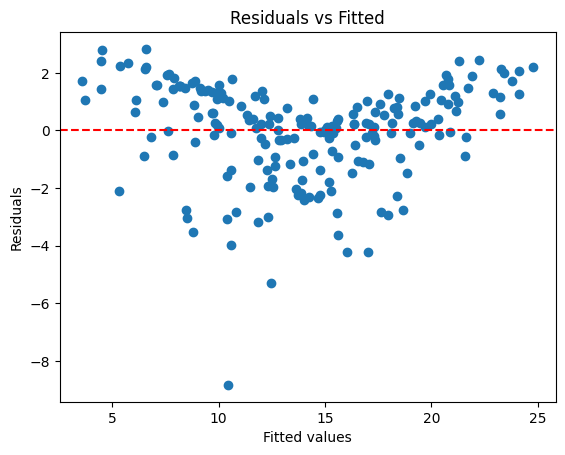

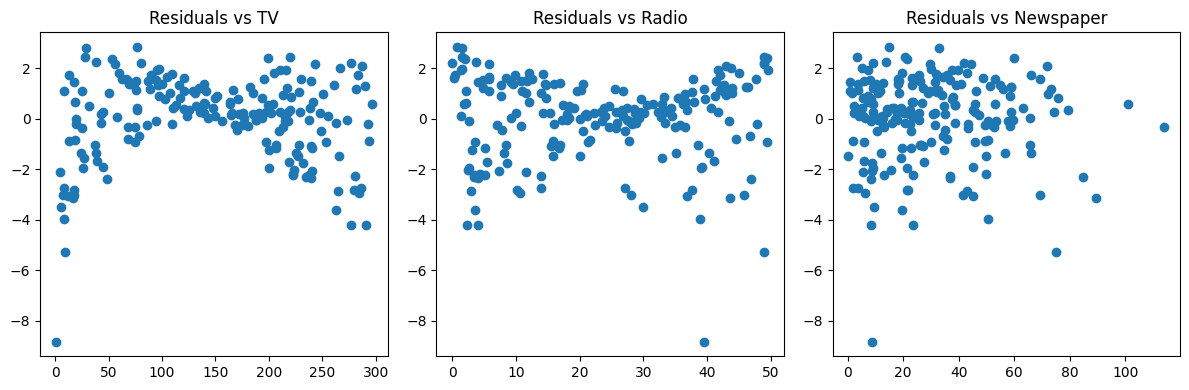

In [11]:
# Residual plot
plt.scatter(y_hat, e)
plt.axhline(0, color='red', linestyle='--')
plt.title("Residuals vs Fitted")
plt.xlabel("Fitted values")
plt.ylabel("Residuals")
plt.show()

# Residuals against predictors
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.scatter(data['TV'], e)
plt.title("Residuals vs TV")

plt.subplot(1, 3, 2)
plt.scatter(data['Radio'], e)
plt.title("Residuals vs Radio")

plt.subplot(1, 3, 3)
plt.scatter(data['Newspaper'], e)
plt.title("Residuals vs Newspaper")

plt.tight_layout()
plt.show()

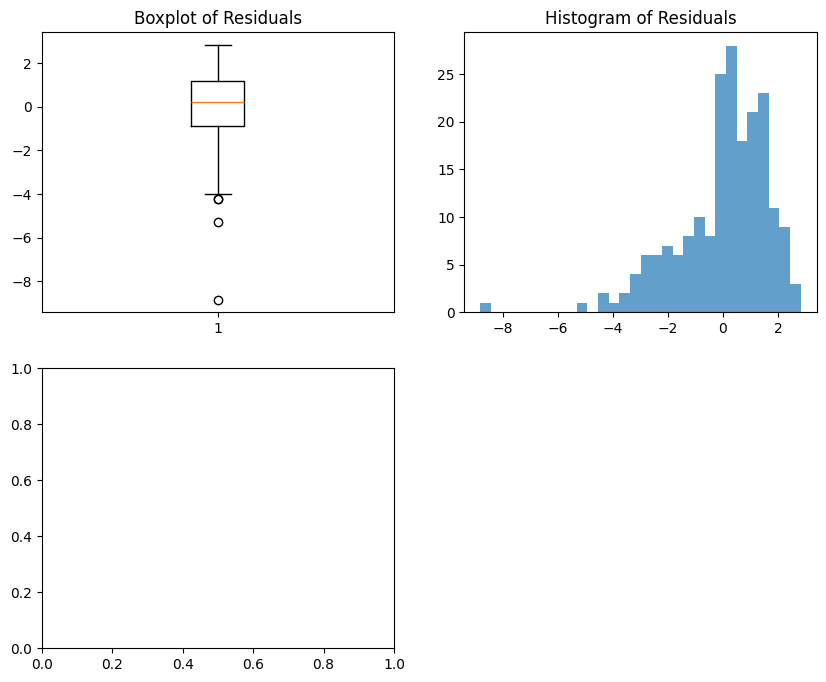

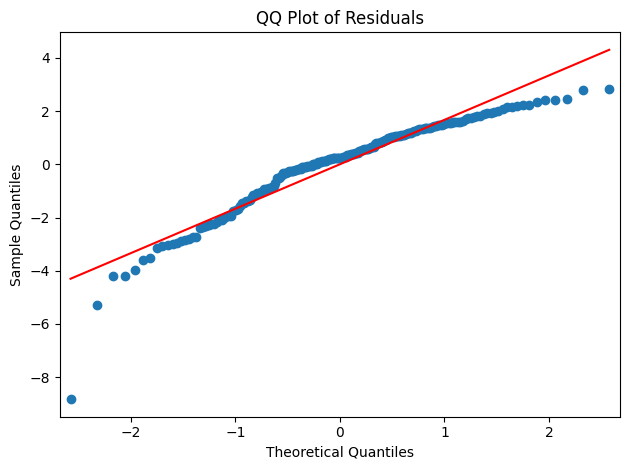

In [12]:
# Checking normality
plt.figure(figsize=(10, 8))
plt.subplot(2, 2, 1)
plt.boxplot(e)
plt.title("Boxplot of Residuals")

plt.subplot(2, 2, 2)
plt.hist(e, bins=30, alpha=0.7)
plt.title("Histogram of Residuals")

plt.subplot(2, 2, 3)
sm.qqplot(e, line='s')
plt.title("QQ Plot of Residuals")

plt.tight_layout()
plt.show()

In [ ]:
# For exampe 2 you need to first download the data from R
# To be added later